In [1]:
from IPython.display import display, HTML
from IPython.display import HTML
import random

def hide_toggle(for_next=False):
    this_cell = """$('div.cell.code_cell.rendered.selected')"""
    next_cell = this_cell + '.next()'

    toggle_text = 'Toggle show/hide'  # text shown on toggle link
    target_cell = this_cell  # target cell to control with toggle
    js_hide_current = ''  # bit of JS to permanently hide code in current cell (only when toggling next cell)

    if for_next:
        target_cell = next_cell
        toggle_text += ' next cell'
        js_hide_current = this_cell + '.find("div.input").hide();'

    js_f_name = 'code_toggle_{}'.format(str(random.randint(1,2**64)))

    html = """
        <script>
            function {f_name}() {{
                {cell_selector}.find('div.input').toggle();
            }}

            {js_hide_current}
        </script>

        <a href="javascript:{f_name}()">{toggle_text}</a>
    """.format(
        f_name=js_f_name,
        cell_selector=target_cell,
        js_hide_current=js_hide_current, 
        toggle_text=toggle_text
    )

    return HTML(html)

hide_toggle()

In [2]:
import requests
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from io import StringIO
pd.set_option('display.max_rows', 5000)


In [3]:
date=''
if(datetime.datetime.now().hour>16 and date==''):
    date = datetime.datetime.now()
else:
    date = (datetime.datetime.now()-datetime.timedelta(1))

#Excluding Saturday and sunday and taking friday as current date
if(date.weekday()>4):
    date = (datetime.datetime.now()-datetime.timedelta(1)).strftime('%d%m%Y') if date.weekday()==5 else (datetime.datetime.now()-datetime.timedelta(2)).strftime('%d%m%Y')
else:
    date = date.strftime('%d%m%Y')
    

In [4]:
# url = {
# 'HEALTHCARE': 'https://www1.nseindia.com/content/indices/ind_niftyhealthcarelist.csv',
# 'AUTO': 'https://www1.nseindia.com/content/indices/ind_niftyautolist.csv',
# 'BANK': 'https://www1.nseindia.com/content/indices/ind_niftybanklist.csv',
# 'CONSUMER': 'https://www1.nseindia.com/content/indices/ind_niftyconsumerdurableslist.csv',
# 'FINANACE': 'https://www1.nseindia.com/content/indices/ind_niftyfinancelist.csv',
# 'FINANCE25_50': 'https://www1.nseindia.com/content/indices/ind_niftyfinancialservices25_50list.csv',
# 'FMCG': 'https://www1.nseindia.com/content/indices/ind_niftyfmcglist.csv',
# 'IT': 'https://www1.nseindia.com/content/indices/ind_niftyitlist.csv',
# 'MEDIA': 'https://www1.nseindia.com/content/indices/ind_niftymedialist.csv',
# 'METAL': 'https://www1.nseindia.com/content/indices/ind_niftymetallist.csv',
# 'OILANDGAS': 'https://www1.nseindia.com/content/indices/ind_niftyoilgaslist.csv',
# 'PHARMA': 'https://www1.nseindia.com/content/indices/ind_niftypharmalist.csv',
# 'PRIVATEBANK': 'https://www1.nseindia.com/content/indices/ind_nifty_privatebanklist.csv',
# 'PSUBANK': 'https://www1.nseindia.com/content/indices/ind_niftypsubanklist.csv',
# 'REALTY': 'https://www1.nseindia.com/content/indices/ind_niftyrealtylist.csv',
# 'SMEEMRGE': 'https://www1.nseindia.com/content/indices/ind_niftysmelist.csv',
# 'COMMODITIES': 'https://www1.nseindia.com/content/indices/ind_niftycommoditieslist.csv',
# 'CPSE': 'https://www1.nseindia.com/content/indices/ind_niftycpselist.csv',
# 'ENERGY': 'https://www1.nseindia.com/content/indices/ind_niftyenergylist.csv',
# 'CONSUMPTION': 'https://www1.nseindia.com/content/indices/ind_niftyconsumptionlist.csv',
# 'INFRA': 'https://www1.nseindia.com/content/indices/ind_niftyinfralist.csv',
# 'MNC': 'https://www1.nseindia.com/content/indices/ind_niftymnclist.csv',
# 'PSE': 'https://www1.nseindia.com/content/indices/ind_niftypselist.csv',
# 'LIQUID15': 'https://www1.nseindia.com/content/indices/ind_niftyservicelist.csv',
# 'TATAGROUP': 'https://www.niftyindices.com/IndexConstituent/ind_nifty_tatalist.csv',
# 'MAHINDRAGROUP': 'https://www.niftyindices.com/IndexConstituent/ind_nifty_mahindralist.csv',
# 'BIRLAGROUP': 'https://www.niftyindices.com/IndexConstituent/ind_nifty_adityabirlalist.csv',
# 'BHAVCOPY': f'https://archives.nseindia.com/products/content/sec_bhavdata_full_date.csv',
# 'INDICES': f'https://archives.nseindia.com/content/indices/ind_close_all_date.csv',
# }

url = {
'nifty 50': 'https://www.niftyindices.com/indexconstituent/ind_nifty50list.csv',
'nifty next 50': 'https://www.niftyindices.com/indexconstituent/ind_niftynext50list.csv',
'nifty auto': 'https://www.niftyindices.com/indexconstituent/ind_niftyautolist.csv',
'nifty bank': 'https://www.niftyindices.com/IndexConstituent/ind_niftybanklist.csv',
'nifty financial services': 'https://www.niftyindices.com/IndexConstituent/ind_niftyfinancelist.csv',
'nifty fmcg': 'https://www.niftyindices.com/IndexConstituent/ind_niftyfmcglist.csv',
'nifty it': 'https://www.niftyindices.com/IndexConstituent/ind_niftyitlist.csv',
'nifty media': 'https://www.niftyindices.com/IndexConstituent/ind_niftymedialist.csv',
'nifty metal': 'https://www.niftyindices.com/IndexConstituent/ind_niftymetallist.csv',
'nifty pharma': 'https://www.niftyindices.com/IndexConstituent/ind_niftypharmalist.csv',
'nifty private bank': 'https://www.niftyindices.com/IndexConstituent/ind_nifty_privatebanklist.csv',
'nifty psu bank': 'https://www.niftyindices.com/IndexConstituent/ind_niftypsubanklist.csv',
'nifty realty': 'https://www.niftyindices.com/IndexConstituent/ind_niftyrealtylist.csv',
'nifty commodities': 'https://www.niftyindices.com/IndexConstituent/ind_niftycommoditieslist.csv',
'nifty cpse': 'https://www.niftyindices.com/IndexConstituent/ind_niftycpselist.csv',
'nifty energy': 'https://www.niftyindices.com/IndexConstituent/ind_niftyenergylist.csv',
'nifty india consumption': 'https://www.niftyindices.com/IndexConstituent/ind_niftyconsumptionlist.csv',
'nifty infrastructure': 'https://www.niftyindices.com/IndexConstituent/ind_niftyinfralist.csv',
'nifty mnc': 'https://www.niftyindices.com/IndexConstituent/ind_niftymnclist.csv',
'nifty pse': 'https://www.niftyindices.com/IndexConstituent/ind_niftypselist.csv',
'nifty services sector': 'https://www.niftyindices.com/IndexConstituent/ind_niftyservicelist.csv',
'nifty sme emerge': 'https://www.niftyindices.com/IndexConstituent/ind_niftysmelist.csv',
'nifty oil and gas': 'https://www.niftyindices.com/IndexConstituent/ind_niftyoilgaslist.csv',
'nifty consumer durables': 'https://www.niftyindices.com/IndexConstituent/ind_niftyconsumerdurableslist.csv',
'nifty tata group': 'https://www.niftyindices.com/indexconstituent/ind_nifty_tatalist.csv',
'nifty mahindra group': 'https://www.niftyindices.com/indexconstituent/ind_nifty_mahindralist.csv',
'nifty aditya birla group': 'https://www.niftyindices.com/indexconstituent/ind_nifty_adityabirlalist.csv',
'bhavcopy': f'https://archives.nseindia.com/products/content/sec_bhavdata_full_date.csv',
'indices': f'https://archives.nseindia.com/content/indices/ind_close_all_date.csv',
}
hide_toggle()

In [6]:
bhavCopy = pd.read_csv(url['BHAVCOPY'].replace('date',date))

In [ ]:
display(HTML(bhavCopy.to_html()))

In [7]:
bhavCopy['percentageChange'] = ((bhavCopy[' CLOSE_PRICE']-bhavCopy[' OPEN_PRICE'])/bhavCopy[' OPEN_PRICE'])*100
#bhavCopy['percentageChange'] = ((bhavCopy[' CLOSE_PRICE']-bhavCopy[' OPEN_PRICE'])/bhavCopy[' OPEN_PRICE'])*100

In [8]:
sample=bhavCopy.head(10)

<AxesSubplot:ylabel='SYMBOL'>

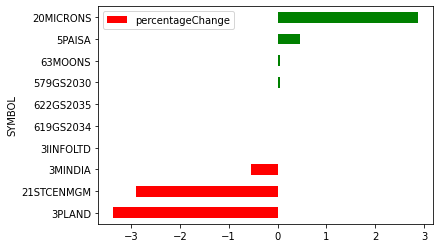

In [9]:
sample = sample.sort_values(by=['percentageChange'])
sample.plot.barh(x='SYMBOL', y='percentageChange', color=(sample['percentageChange'] > 0).map({True: 'g',
                                                    False: 'r'}), sort_columns=True)

In [10]:
import seaborn as sns

<AxesSubplot:xlabel='percentageChange', ylabel='SYMBOL'>

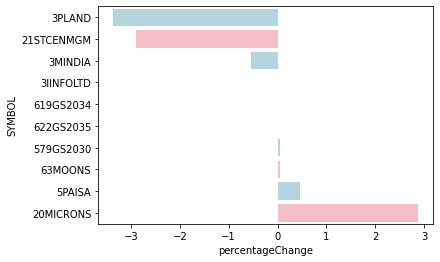

In [11]:
sns.barplot(y='SYMBOL', x='percentageChange', data=sample, palette=["lightblue", "lightpink"])

In [12]:
sns.catplot(y='SYMBOL', x='percentageChange', data=sample, hue='percentType', kind = 'bar',palette=["red", "green"])

ValueError: Could not interpret input 'percentType'

In [ ]:
sample['percentType'] = 'Positive' if sample['percentageChange']>=0 else 'Negative'

In [ ]:
sample

In [13]:
m = pd.read_csv(url['METAL'])
m.columns = m.columns.str.replace(' ', '')
bhavCopy.columns = bhavCopy.columns.str.replace(' ', '')

In [14]:
metal = m.merge(bhavCopy,left_on='Symbol', right_on='SYMBOL', how='inner')

In [15]:
metal = metal.sort_values(by=['percentageChange'], ascending=False)
metal.loc[metal['percentageChange']>=0, 'Change'] = 'Positive'
metal.loc[metal['percentageChange']<0, 'Change'] = 'Negative'

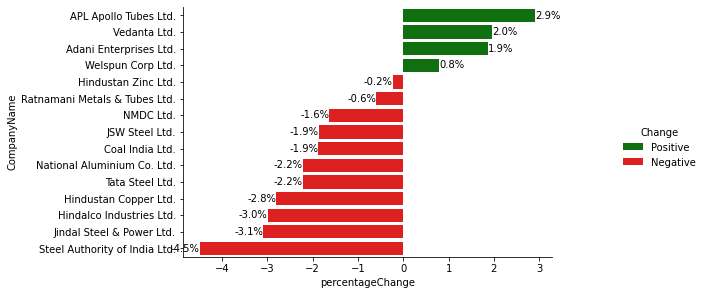

In [16]:
g = sns.catplot(y='CompanyName', x='percentageChange', data=metal, hue='Change', kind = 'bar',palette=["green", "red"], dodge=False)
g.fig.set_size_inches(15, 5)
g.fig.subplots_adjust(top=0.81, right=0.86)
ax = g.facet_axis(0, 0)
for c in ax.containers:
    labels = [f'{(v.get_width()):.1f}%' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')


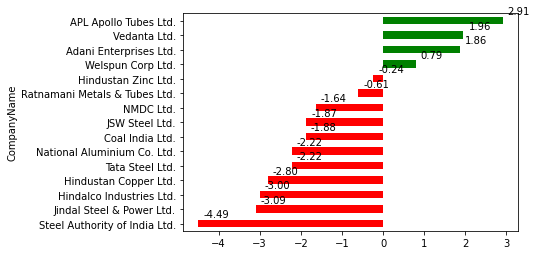

In [17]:
metal = metal.sort_values(by=['percentageChange'], ascending=True)

ax = metal.plot.barh(x='CompanyName', y='percentageChange', color=(metal['percentageChange'] >= 0).map({True: 'g',
                                                    False: 'r'}),legend=False)

for p in ax.patches:
    ax.annotate("%.2f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y()), xytext=(5, 10), textcoords='offset points')

In [ ]:
#Best Performing stock
bhavCopy = pd.read_csv(url['BHAVCOPY'])
bhavCopy.columns = bhavCopy.columns.str.replace(' ', '')
bhavCopy['%Change'] = ((bhavCopy['CLOSE_PRICE']-bhavCopy['PREV_CLOSE'])/bhavCopy['PREV_CLOSE'])*100
bhavCopy.loc[bhavCopy['%Change']>=0, 'Change'] = 'Positive'
bhavCopy.loc[bhavCopy['%Change']<0, 'Change'] = 'Negative'
highReturnsSecurities = bhavCopy.sort_values(by='%Change', ascending=False)[:10]
highVolume = bhavCopy.sort_values(by='TTL_TRD_QNTY', ascending=False)[:10]
bestPerformingSecurities = bhavCopy.loc[(bhavCopy['%Change']>3)].sort_values(by='TTL_TRD_QNTY', ascending=False)[:10]
worstPerformingSecurities = bhavCopy.loc[(bhavCopy['%Change']<0)].sort_values(by='TTL_TRD_QNTY', ascending=False)[:10]
highVolumePalette = ['tomato', 'mediumslateblue'] if highVolume['%Change'].iloc[0]<0 else ['mediumslateblue', 'tomato']

In [ ]:
stocks = {'Top 10 Securities with highest returns today': highReturnsSecurities, 
          'Top 10 Best performing securities with high volume today': bestPerformingSecurities,
          'Top 10 Worst performing securities with High volume today': worstPerformingSecurities,
         'Top 10 sSecurities with highest traded volume': highVolume}

stockPalette = {'Top 10 Securities with highest returns today': ["mediumslateblue"], 
          'Top 10 Best performing securities with high volume today': ['mediumslateblue'],
          'Top 10 Worst performing securities with High volume today': ['tomato'],
         'Top 10 Securities with highest traded volume': highVolumePalette}


In [ ]:
sns.set_style('whitegrid')
for n,i in stocks.items():
    g = sns.catplot(y='SYMBOL', x='%Change', data=i, hue='Change', kind = 'bar',palette=stockPalette[n], dodge=False)
    g.fig.set_size_inches(15, 5)
    g.fig.suptitle(n,size=16,y=0.01,x=0.4)
    g.fig.subplots_adjust(top=0.81, right=0.86)
    ax = g.facet_axis(0, 0)
    for c in ax.containers:
        labels = [f'{(v.get_width()):.1f}%' for v in c]
        ax.bar_label(c, labels=labels, label_type='edge')
    g.savefig(f'{n}.jpg')

In [ ]:
bhavCopy.sort_values(by='TTL_TRD_QNTY', ascending=False)

In [ ]:
import requests

In [ ]:
url = 'https://www.nseindia.com/api/equity-stockIndices?index=NIFTY%2050'
https://www.nseindia.com/api/equity-stockIndices?index=NIFTY%20BANK
header = {'accept-encoding':'gzip, deflate',
         'accept-language':'en-US,en;q=0.9',
         'cookie':'23E00F0F504F68426F85F42F38C8286C~ECPjHqiTQ7FhAr2Xiu3HABsIM3CBt6MSVswNplEqe0h12Y3lZc6oLCOqPiBhepZKdEAUKEyxBHMPqx/Lq6Qmj9ajv6iDWLzmP109jlgxZxnllGUoLTPThFcYyPmYCctjY54zYypbLmysV4fMZ/Pk3VoGlpSArbBFkZMUsIHqmbI=',
         'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/94.0.4606.71 Safari/537.36'}
data = requests.get(url,headers=header)

In [ ]:
import pandas as pd
df = pd.DataFrame(data.json()['data'])
df

In [ ]:
bestPerformingSecurities

In [ ]:
import yfinance as yf

msft = yf.Ticker("TCS.NS")

# get stock info
msft.info

# get historical market data
#hist = msft.history(period="max")

# show actions (dividends, splits)
#print(msft.actions)

# show dividends
#print(msft.dividends)

# show splits
#print(msft.splits)

# show financials
#print(msft.financials)
#print(msft.quarterly_financials)

# show major holders
#print(msft.major_holders)

# show institutional holders
#print(msft.institutional_holders)

# show balance sheet
#print(msft.balance_sheet)
#print(msft.quarterly_balance_sheet)

# show cashflow
#print(msft.cashflow)
#print(msft.quarterly_cashflow)

# show earnings
#print(msft.earnings)
#print(msft.quarterly_earnings)

# show sustainability
#print(msft.sustainability)

# show analysts recommendations
#print(msft.recommendations)

# show next event (earnings, etc)
#print(msft.calendar)

# show ISIN code - *experimental*
# ISIN = International Securities Identification Number
#print(msft.isin)

# show options expirations
#print(msft.options)

# show news
#print(msft.news)

# get option chain for specific expiration
#opt = msft.option_chain('YYYY-MM-DD')
# data available via: opt.calls, opt.puts

In [9]:
def checkWeekend(dateCal):
    if (dateCal.weekday()>4):
        dateCal = (dateCal-datetime.timedelta(1)) if date.weekday()==5 else (dateCal-datetime.timedelta(2))
    return dateCal


currDate=''
if(datetime.datetime.now().hour>16 and date==''):
    date = datetime.datetime.now()
else:
    date = (datetime.datetime.now()-datetime.timedelta(1))


dates = {'currDate' : checkWeekend(date).strftime('%d%m%Y'),
'T7date' : checkWeekend(date-datetime.timedelta(7)).strftime('%d%m%Y'),
'T30date' : checkWeekend(date-datetime.timedelta(30)).strftime('%d%m%Y'),
'T180date' : checkWeekend(date-datetime.timedelta(180)).strftime('%d%m%Y'),
'T365date' : checkWeekend(date-datetime.timedelta(365)).strftime('%d%m%Y'),
'T1825date' : checkWeekend(date-datetime.timedelta(1825)).strftime('%d%m%Y'),
'T3650date' : checkWeekend(date-datetime.timedelta(3650)).strftime('%d%m%Y')}


In [20]:
def getData(code, date=''):
    if(date!=''):
        uri = url[code].replace('date',date)
        headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.190 Safari/537.36'
        }
        d = requests.get(uri,headers=headers)
        if(d.status_code==200):
            data = StringIO(d.text)
            df = pd.read_csv(data)
            return df
        else:
            date = (datetime.datetime.strptime(date, '%d%m%Y')-datetime.timedelta(1)).strftime('%d%m%Y')
            return getData(code,date)
    else:
        headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.190 Safari/537.36'
        }
        d = requests.get(url[code],headers=headers)
        if(d.status_code==200):
            data = StringIO(d.text)
            df = pd.read_csv(data)
        return df


In [10]:
indicesToday = getData('indices','09112021')
indicesT7 = getData('indices',dates['T365date'])

In [11]:
indicesT7.columns = indicesT7.columns.str.replace(' ', '')
indicesToday.columns = indicesToday.columns.str.replace(' ', '')

In [12]:
indicesToday.columns

Index(['IndexName', 'IndexDate', 'OpenIndexValue', 'HighIndexValue',
       'LowIndexValue', 'ClosingIndexValue', 'PointsChange', 'Change(%)',
       'Volume', 'Turnover(Rs.Cr.)', 'P/E', 'P/B', 'DivYield'],
      dtype='object')

In [13]:
t7d = indicesToday[['IndexName', 'IndexDate', 'ClosingIndexValue']].merge(indicesT7[['IndexName', 'IndexDate', 'ClosingIndexValue']],
                                                                   how='inner', on='IndexName')
t7d['%Change'] = ((t7d['ClosingIndexValue_x']-t7d['ClosingIndexValue_y'])/t7d['ClosingIndexValue_y'])*100.0

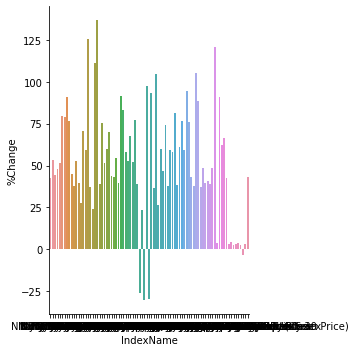

In [14]:
import seaborn as sns
sns.catplot(y='%Change', x='IndexName', data=t7d, kind = 'bar', dodge=False)

In [15]:
t7d['IndexName']=t7d['IndexName'].str.lower()

In [16]:
best_sector = t7d.loc[t7d['IndexName'].isin(url.keys())].sort_values(by='%Change', ascending=False).reset_index().drop('index',axis=1).loc[0,'IndexName']
sectorPerf = t7d.loc[t7d['IndexName'].isin(url.keys())].sort_values(by='%Change', ascending=False).reset_index().drop('index',axis=1).loc[0,'%Change']

In [21]:
sector = getData(best_sector)

In [22]:
sector

,Company Name,Industry,Symbol,Series,ISIN Code
0,Brigade Enterprises Ltd.,CONSTRUCTION,BRIGADE,EQ,INE791I01019
1,DLF Ltd.,CONSTRUCTION,DLF,EQ,INE271C01023
2,Godrej Properties Ltd.,CONSTRUCTION,GODREJPROP,EQ,INE484J01027
3,Indiabulls Real Estate Ltd.,CONSTRUCTION,IBREALEST,EQ,INE069I01010
4,Macrotech Developers Ltd.,CONSTRUCTION,LODHA,EQ,INE670K01029
5,Oberoi Realty Ltd.,CONSTRUCTION,OBEROIRLTY,EQ,INE093I01010
6,Phoenix Mills Ltd.,CONSTRUCTION,PHOENIXLTD,EQ,INE211B01039
7,Prestige Estates Projects Ltd.,CONSTRUCTION,PRESTIGE,EQ,INE811K01011
8,Sobha Ltd.,CONSTRUCTION,SOBHA,EQ,INE671H01015
9,Sunteck Realty Ltd.,CONSTRUCTION,SUNTECK,EQ,INE805D01034


In [24]:
bcToday = getData('bhavcopy','09112021')
bcT7 = getData('bhavcopy',dates['T365date'])

In [27]:
bcToday.columns = bcToday.columns.str.replace(' ', '')
bcT7.columns = bcT7.columns.str.replace(' ', '')

In [28]:
bcToday.columns

Index(['SYMBOL', 'SERIES', 'DATE1', 'PREV_CLOSE', 'OPEN_PRICE', 'HIGH_PRICE',
       'LOW_PRICE', 'LAST_PRICE', 'CLOSE_PRICE', 'AVG_PRICE', 'TTL_TRD_QNTY',
       'TURNOVER_LACS', 'NO_OF_TRADES', 'DELIV_QTY', 'DELIV_PER'],
      dtype='object')

In [36]:
sectorperf = bcToday[['SYMBOL','DATE1','CLOSE_PRICE']].\
merge(bcT7[['SYMBOL','DATE1','CLOSE_PRICE']], how='inner', on='SYMBOL').\
merge(sector[['Symbol']], how='inner', left_on='SYMBOL', right_on='Symbol')

sectorperf['%Change'] = ((sectorperf['CLOSE_PRICE_x']-sectorperf['CLOSE_PRICE_y'])/sectorperf['CLOSE_PRICE_y'])*100.0

In [38]:
sectorperf.sort_values(by='%Change', ascending=False)

,SYMBOL,DATE1_x,CLOSE_PRICE_x,DATE1_y,CLOSE_PRICE_y,Symbol,%Change
3,IBREALEST,09-Nov-2021,191.05,10-Nov-2020,48.35,IBREALEST,295.139607
7,SOBHA,09-Nov-2021,907.05,10-Nov-2020,293.05,SOBHA,209.520560
2,GODREJPROP,09-Nov-2021,2420.95,10-Nov-2020,957.30,GODREJPROP,152.893555
0,BRIGADE,09-Nov-2021,494.10,10-Nov-2020,202.15,BRIGADE,144.422459
1,DLF,09-Nov-2021,437.40,10-Nov-2020,180.50,DLF,142.326870
4,OBEROIRLTY,09-Nov-2021,1014.05,10-Nov-2020,433.60,OBEROIRLTY,133.867620
6,PRESTIGE,09-Nov-2021,514.85,10-Nov-2020,257.00,PRESTIGE,100.330739
8,SUNTECK,09-Nov-2021,488.50,10-Nov-2020,265.95,SUNTECK,83.681143
5,PHOENIXLTD,09-Nov-2021,1089.50,10-Nov-2020,603.35,PHOENIXLTD,80.575122
